# LabAst577 - Observational Astronomy
# Notebook with some basic data reduction and analysis with python

## First, import necessary libraries

In [ ]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from astropy.io import fits

## Shift image to align with another

In [ ]:
# Directory path
dir = "/content/sample_data/"

# List of filenames to iterate over
base_filename = "m57_Blue_"

# Initialize empty lists for data and headers
data_all = []
head_all = []

# Loop through each file number and load the data and headers

for num in range(336,355):
    if num!=382 and num != 345:
        filename = f"{base_filename}{num}.fits"
        data_all.append(fits.getdata(dir + filename))
        head_all.append(fits.getheader(dir + filename))

In [ ]:
## Obtain rough position with the mouse
pos_all = []

'''# for RED filter:

for a in data_all:
  pos_all.append([155,265])'''

'''# for GREEN filter:

for a in range(1,12):
  pos_all.append([115,370])

for a in range(12,22):
  pos_all.append([140,320])'''

# for BLUE filter:

for a in range(1,12):
  pos_all.append([94,415])

for a in range(12,22):
  pos_all.append([115,400])

In [ ]:
!pip install photutils #only needed if its being run on colabs

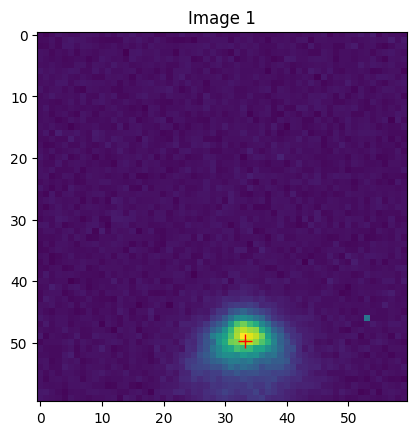

Image 1 - 2D Gaussian Center: [ 97.26658686 434.69850688]


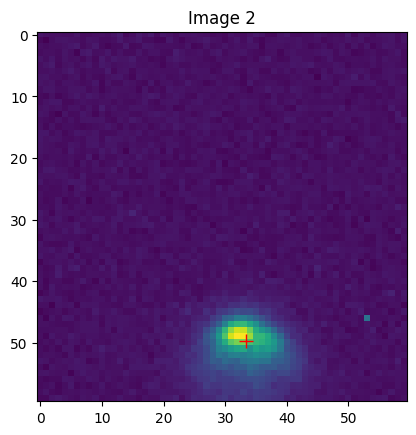

Image 2 - 2D Gaussian Center: [ 97.32332545 434.78222632]


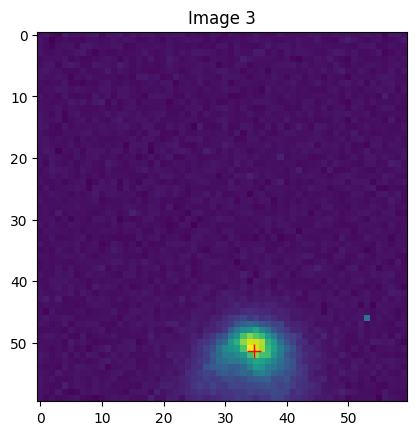

Image 3 - 2D Gaussian Center: [ 98.68987787 436.28177876]


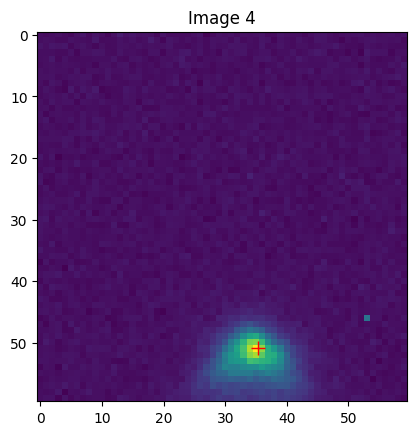

Image 4 - 2D Gaussian Center: [ 99.28324304 435.87018206]


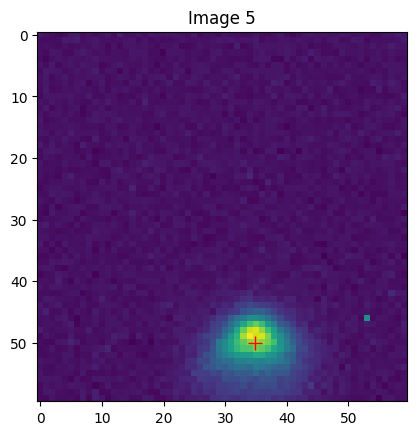

Image 5 - 2D Gaussian Center: [ 98.78404242 435.07426928]


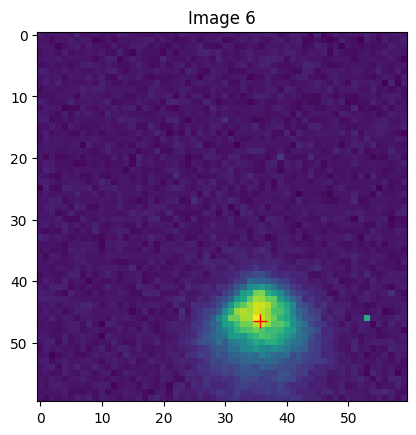

Image 6 - 2D Gaussian Center: [ 99.65214365 431.52592261]


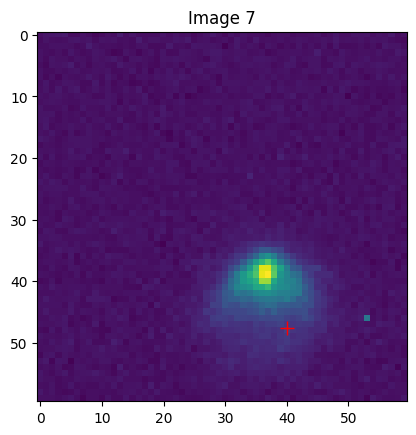

Image 7 - 2D Gaussian Center: [103.98724046 432.59808098]


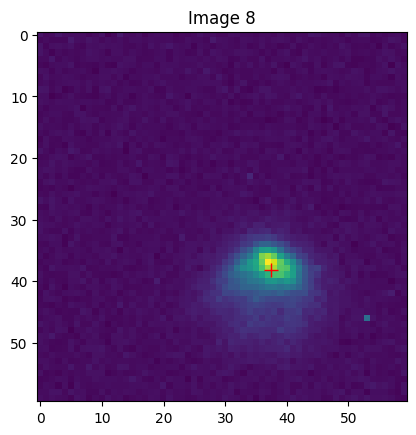

Image 8 - 2D Gaussian Center: [101.38417584 423.15833717]


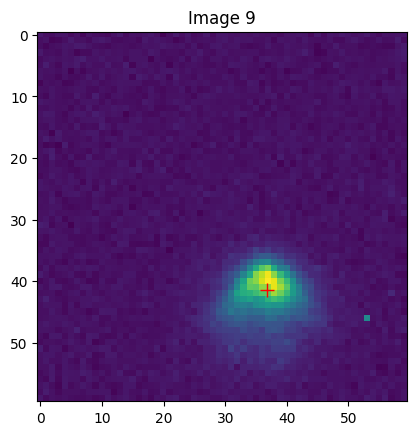

Image 9 - 2D Gaussian Center: [100.73033061 426.36809866]


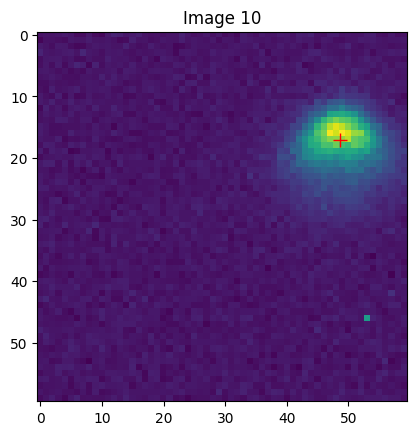

Image 10 - 2D Gaussian Center: [112.66081116 402.16537738]


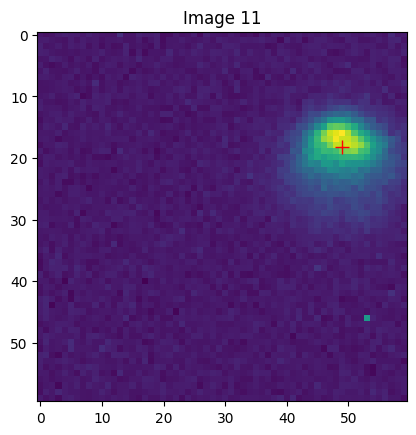

Image 11 - 2D Gaussian Center: [113.03495742 403.28062147]


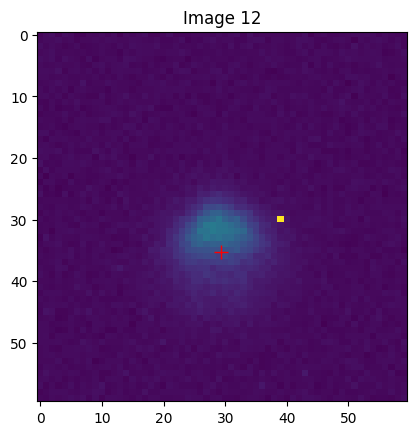

Image 12 - 2D Gaussian Center: [114.24745214 405.19316424]


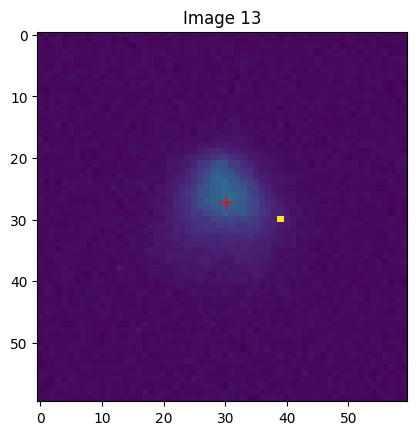

Image 13 - 2D Gaussian Center: [115.19644208 397.19538359]


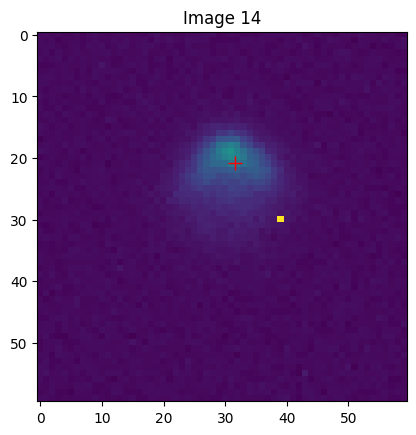

Image 14 - 2D Gaussian Center: [116.57079141 390.75991867]


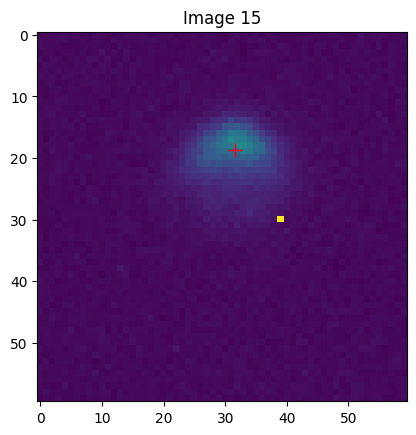

Image 15 - 2D Gaussian Center: [116.62426278 388.76998003]


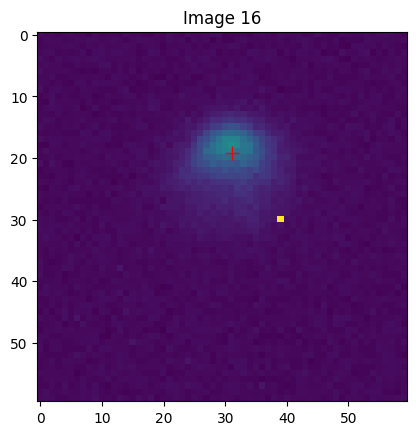

Image 16 - 2D Gaussian Center: [116.02483443 389.12869687]


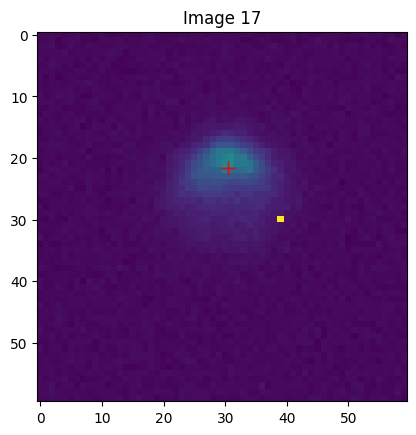

Image 17 - 2D Gaussian Center: [115.43851924 391.67038437]


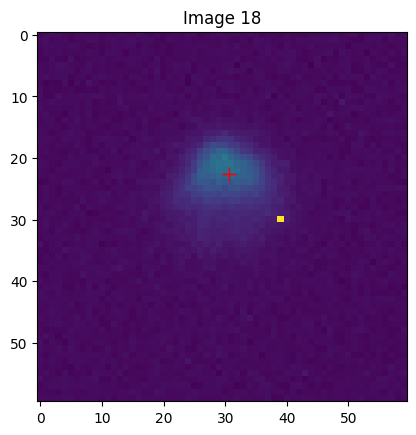

Image 18 - 2D Gaussian Center: [115.57206766 392.63278336]


In [ ]:
from photutils.centroids import centroid_2dg

centers_2dg = []  # To store centers calculated using 2D Gaussian

# Loop through each image and position
for i, (data, pos) in enumerate(zip(data_all, pos_all)):
    # Extract the sub-image (60x60) around the specified position
    subdata = data[pos[1]-30:pos[1]+30, pos[0]-30:pos[0]+30]

    # Display the sub-image (optional)
    plt.imshow(subdata)
    plt.title(f"Image {i+1}")

    # Show centroids
    plt.plot(centroid_2dg(subdata)[0], centroid_2dg(subdata)[1], 'r+', markersize=10, label='Centroid')
    plt.show()
# for BLUE filter:

for a in range(1,12):
  pos_all.append([94,415])

for a in range(12,22):
  pos_all.append([115,400])

centers_2dg = []  # To store centers calculated using 2D Gaussian
    # Calculate centroids
    center_2dg = centroid_2dg(subdata) + pos - [30, 30]

    # Store the results
    centers_2dg.append(center_2dg)

    # Print the results for each image
    print(f"Image {i+1} - 2D Gaussian Center: {center_2dg}")



In [ ]:
from scipy.ndimage import shift

reference_center = centers_2dg[0]  # Choose the first image's center as the reference
reference_image = data_all[0]    # Choose the first image as the reference image

shifted_images_2 = []  # To store shifted images

mask_y1 = 0
mask_x1 = 0
mask_y2 = 0
mask_x2 = 0

for i, (data, center) in enumerate(zip(data_all, centers_2dg)):
    # Calculate the required shift in the y and x axes relative to the reference center
    shift_y = -int(np.round(center[1]-reference_center[1]))
    shift_x = -int(np.round(center[0]-reference_center[0]))

    # Save the overall mask

    if shift_y < mask_y1:
      mask_y1 = shift_y

    if shift_x < mask_x1:
      mask_x1 = shift_x

    if shift_y > mask_y2:
      mask_y2 = shift_y

    if shift_x > mask_x2:
      mask_x2 = shift_x

    # Shift the image using scipy.ndimage.shift
    shifted_data = shift(data, (shift_y, shift_x), mode='constant', cval=0.0)

    # Store the shifted image
    shifted_images_2.append(shifted_data)

In [ ]:
# Sum all the shifted images to create a single combined 2D image
combined_image = np.sum(shifted_images_2, axis=0)

# Set pixels outside the bounds to 0

h, w = combined_image.shape


combined_image[:mask_y2, :] = 0           # Rows above mask_y1
combined_image[h + mask_y1 + 1:, :] = 0       # Rows below mask_y2
combined_image[:, :mask_x2] = 0           # Columns left of mask_x1
combined_image[:, w + mask_x1 + 1:] = 0       # Columns right of mask_x2

# Define the filename for each shifted image (you can customize the naming scheme)
filename = f"{dir}m57_Blue_mask_combined.fits"

# Save the shifted image along with the updated header
fits.writeto(filename, combined_image, overwrite=True)

print(f"Saved: {filename}")

Saved: /content/sample_data/m57_Blue_mask_combined.fits


**Make the plot**

Text(0, 0.5, 'ypix')

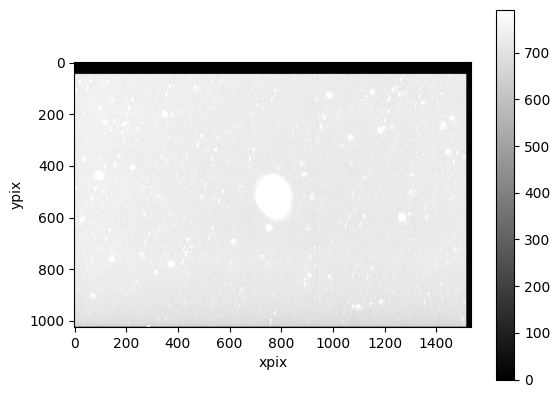

In [ ]:
#one plot
lo,up = np.percentile(combined_image,5),np.percentile(combined_image,95)
plt.figure()
plt.imshow(combined_image,cmap='gray',clim=(lo,up))
plt.colorbar()
plt.xlabel('xpix')
plt.ylabel('ypix')

## Other tools

### Better alignment:
https://github.com/toros-astro/astroalign

### RGB color composite:
http://docs.astropy.org/en/stable/visualization/rgb.html

### To do aperture photometry:
https://photutils.readthedocs.io/en/stable/aperture.html

### To do PSF photometry:
https://photutils.readthedocs.io/en/stable/psf.html

### To do surface photometry:
https://photutils.readthedocs.io/en/stable/isophote.html

### To analyze time-series:
https://docs.astropy.org/en/stable/timeseries/

### On model fitting:
https://emcee.readthedocs.io/en/stable/tutorials/line/

## **Tirar o background**

In [ ]:
!pip install photutils #only needed if its being run on colabs

NameError: name 'science_calibrated' is not defined

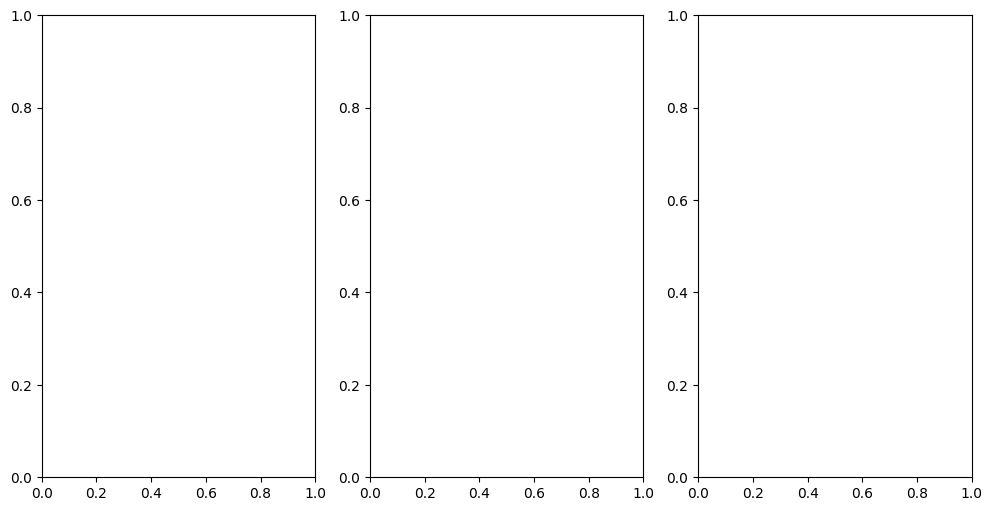

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(12,6))
lo,up = np.percentile(science_calibrated,1),np.percentile(science_calibrated,99)
ax[0].imshow(science_calibrated,cmap='gray',clim=(lo,up))
lo,up = np.percentile(bkg.background[mask==False],1),np.percentile(bkg.background[mask==False],95)
ax[1].imshow(bkg.background,cmap='gray',clim=(lo,up))
lo,up = np.percentile(science_calibrated-bkg.background,1),np.percentile(science_calibrated-bkg.background,99)
ax[2].imshow(science_calibrated-bkg.background,cmap='gray',clim=(lo,up))

In [ ]:
lo,up = np.percentile(bkg.background_rms[mask==False],1),np.percentile(bkg.background_rms[mask==False],95)
plt.imshow(bkg.background_rms,cmap='gray',clim=(lo,up))
plt.colorbar()